In [1]:
import torch
import numpy as np
from dptb.nn.dftb2nnsk import DFTB2NNSK
import matplotlib.pyplot as plt
from dptb.entrypoints.collectskf import skf2nnsk
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
import json

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


/root/dptb_venv/lib/python3.10/site-packages/torch/nested/__init__.py:107: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(ts, dtype, None, device, None)


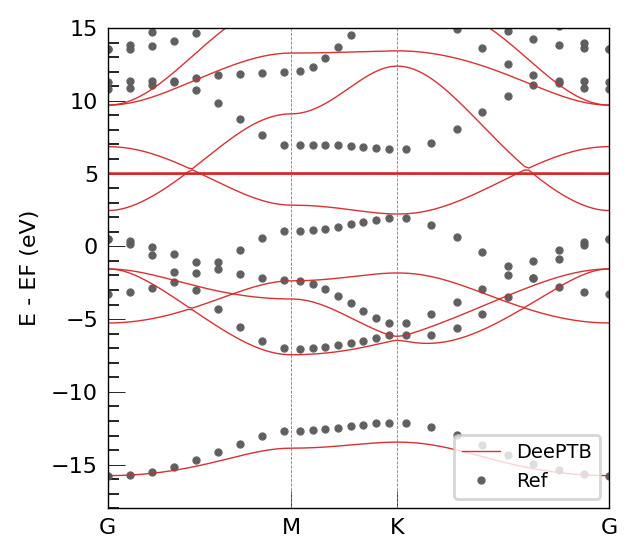

In [2]:
model = build_model('./dptb_base_poly2.pth',no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 

stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)

##  你会发现上面的能带怎么 在 5 eV 附近有一个平的带呢？这是因为我们默认的采用的轨道是spd。 对于 h-BN d orbital 全部为的所有hopping， onside 全部0 是无效信息。 
## 我们可以手动指定 轨道信息

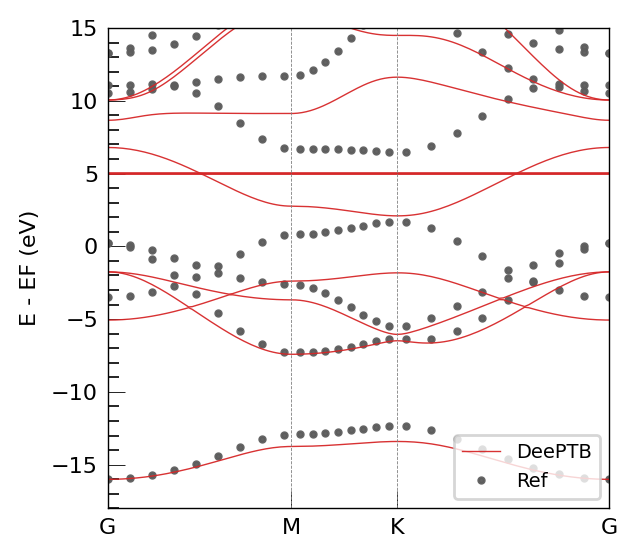

In [3]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}

model = build_model('./dptb_base_poly4.pth',common_options=common_options, no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)


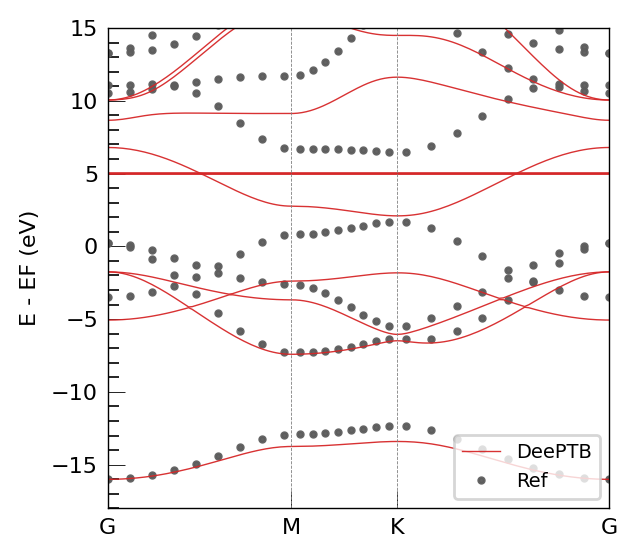

In [4]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    }
}

model = build_model('./dptb_base_poly4.pth',common_options=common_options, no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)


In [21]:
lllll = "".join(list(common_options['basis'].keys()))
print(lllll)

BN


In [23]:
import re

In [28]:
re.findall(r'[A-Za-z]', 'd*')[0]

'd'

In [4]:
json_dict = model.to_json(basisref={"B": {"s":"2s", "p":"2p", "d":"d*"}, "N": {"s":"2s", "p":"2p", "d":"d*"}}) 
 

In [5]:
json_dict

{'version': 2,
 'unit': 'eV',
 'model_options': {'nnsk': {'onsite': {'method': 'uniform'},
   'hopping': {'method': 'poly4pow',
    'rs': {'B-B': 4.22, 'B-N': 4.04, 'N-B': 4.04, 'N-N': 3.85},
    'w': 0.2},
   'soc': {},
   'freeze': False,
   'push': False,
   'std': 0.01,
   'atomic_radius': 'cov'}},
 'common_options': {'basis': {'B': ['2s', '2p', 'd*'],
   'N': ['2s', '2p', 'd*']},
  'dtype': 'float32',
  'device': 'cuda',
  'overlap': True},
 'model_params': {'onsite': {'B-2s-0': [-0.05371570587158203],
   'B-2p-0': [0.11017870903015137],
   'B-d*-0': [0.0],
   'N-2s-0': [-0.15561676025390625],
   'N-2p-0': [0.1445450782775879],
   'N-d*-0': [0.0]},
  'hopping': {'B-B-2s-2s-0': [-4.163856506347656,
    3.1430838108062744,
    3.5406551361083984,
    -13.840292930603027,
    4.28679084777832,
    0.0003413402009755373],
   'B-B-2s-2p-0': [-4.2632155418396,
    1.855499505996704,
    5.719208240509033,
    -12.824378967285156,
    2.3826582431793213,
    0.00027443747967481613],
   '

In [6]:
import json

In [7]:
# dump  json_dict to json file
with open('./hBN_ckpt.json', 'w') as f:
    json.dump(json_dict, f, indent=4)


In [8]:
nnsk_json = NNSK.from_reference(checkpoint= "./hBN_ckpt.json")

CUDA is not available. The model will be loaded on CPU.


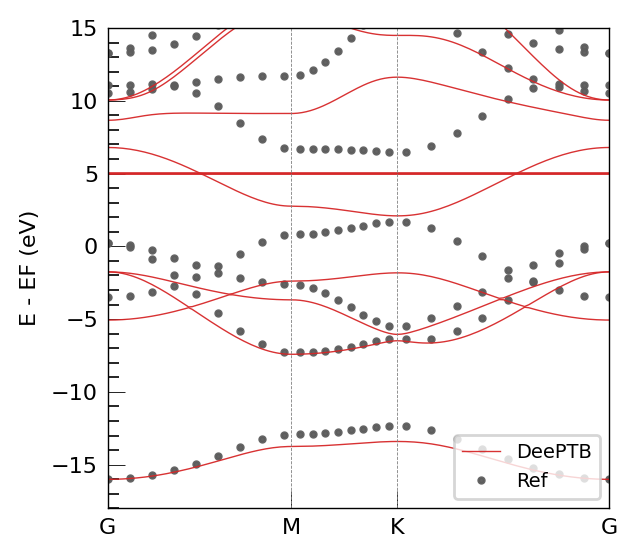

In [11]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}

model = nnsk_json
#build_model("./hBN_ckpt.json", no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)


In [17]:
from dptb.nn.sktb.onsiteDB import  onsite_energy_database

In [26]:
model.model_options['nnsk']['onsite']['method']

'uniform_noref'

In [21]:
model.idp_sk.basis

{'B': ['s', 'p', 'd'], 'N': ['s', 'p', 'd']}

In [9]:
model.model_options['nnsk']['onsite']['method']

'uniform_noref'

In [15]:
model.onsite_param.data

tensor([[[ -9.4367],
         [ -3.6036],
         [  0.0000]],

        [[-18.5756],
         [ -7.0928],
         [  0.0000]]])

In [31]:
model.onsite_param.data[model.idp_sk.chemical_symbol_to_type['B'], 0]

tensor([-9.4367])

In [11]:
model.basis

{'B': ['s', 'p', 'd'], 'N': ['s', 'p', 'd']}

In [15]:
show_onsites({'B': ['s', 'p', 'd'], 'N': ['s', 'p', 'd']})

B
	2s: -9.3830
	2p: -3.7138
	s*: 17.8283
	p*: 23.4975
	d*: 0.0000
N
	2s: -18.4200
	2p: -7.2373
	s*: 8.7913
	p*: 19.9740
	d*: 0.0000


In [19]:
model.idp_sk.skonsite_maps

{'1s-1s': slice(0, 1, None),
 '1p-1p': slice(1, 2, None),
 '1d-1d': slice(2, 3, None)}

In [12]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}


In [13]:
from dptb.entrypoints.emp_sk import to_empsk


In [14]:
to_empsk(outdir='./', common_options=common_options,basemodel='poly2')

{'version': 2,
 'unit': 'eV',
 'model_options': {'nnsk': {'onsite': {'method': 'uniform_noref'},
   'hopping': {'method': 'poly2pow',
    'rs': {'B-B': 4.22, 'B-N': 4.04, 'N-B': 4.04, 'N-N': 3.85},
    'w': 0.2},
   'soc': {},
   'freeze': False,
   'push': False,
   'std': 0.01,
   'atomic_radius': 'cov'}},
 'common_options': {'basis': {'B': ['s', 'p', 'd'], 'N': ['s', 'p', 'd']},
  'dtype': 'float32',
  'device': 'cuda',
  'overlap': True},
 'model_params': {'onsite': {'B-s-0': [-9.436724662780762],
   'B-p-0': [-3.6036229133605957],
   'B-d-0': [0.0],
   'N-s-0': [-18.575620651245117],
   'N-p-0': [-7.092767238616943],
   'N-d-0': [0.0]},
  'hopping': {'B-B-s-s-0': [-4.038558483123779,
    -1.199519157409668,
    2.6829679012298584,
    -1.6895099878311157],
   'B-B-s-p-0': [-4.128350734710693,
    -1.6135889291763306,
    2.751228094100952,
    -1.3629639148712158],
   'B-B-s-d-0': [0.0017082728445529938,
    -0.00010188308078795671,
    0.000718078576028347,
    0.3730551898479461

In [21]:
nnsk_json = NNSK.from_reference(checkpoint= "./emp_sk.json")

CUDA is not available. The model will be loaded on CPU.


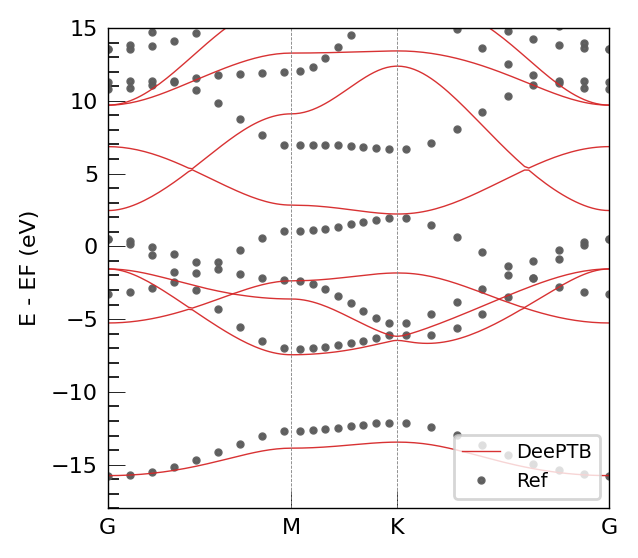

In [22]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}

model = nnsk_json
#build_model("./hBN_ckpt.json", no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)


In [25]:
model.name

'nnsk'

In [28]:
model.model_options

{'nnsk': {'onsite': {'method': 'uniform_noref'},
  'hopping': {'method': 'poly2pow',
   'rs': {'B-B': 4.22, 'B-N': 4.04, 'N-B': 4.04, 'N-N': 3.85},
   'w': 0.2},
  'soc': {},
  'freeze': False,
  'push': None,
  'std': 0.01,
  'atomic_radius': 'cov'}}

In [3]:
model.device

'cpu'